<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predict Term Deposit" </div>

## Objectives of exercise

Bank has multiple banking products that it sells to customer such as saving account, credit cards, investments etc. It wants to which customer will purchase its credit cards. For the same it has various kind of information regarding the demographic details of the customer, their banking behavior etc. Once it can predict the chances that customer will purchase a product, it wants to use the same to make pre-payment to the authors.

In this part I will demonstrate how to build a model, to predict which clients will subscribing to a term deposit, with inception of machine learning. In the ﬁrst part we will deal with the description and visualization of the analysed data, and in the second we will go to data classiﬁcation models.


Predict if a client will subscribe (yes/no) to a term deposit — this is defined as a classification problem.

## Data description

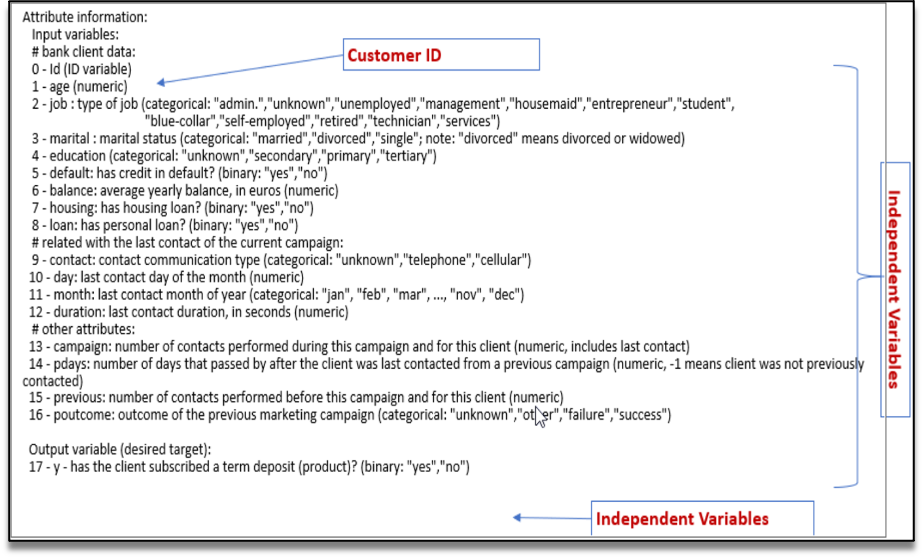

## Sources and References

-https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit

-https://www.kaggle.com/code/mahmoudhassanmahmoud/predict-term-deposit-with-accuracy-93

-https://www.kaggle.com/code/saumitgp/predict-term-deposit-data

## Exercise strategies

- [1. Exploring The Dataset](#a)
    - [1.1 Load The Dataset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Data Visualization and Exploratory Data Anlysis(EDA)](#2)
- [3. Data preprocessing and feature engineering](#3)
    - [3.1 Encoding Categorical Variables](#3.1)
    - [3.2 Min-Max Scaling or Standardization?](#3.2)
- [4. Data Splitting and Model Building](#4)
   - [4.1 Data Splitting](#4.1)
   - [4.2 Model Buiding](#4.2)
       - [4.2.1 Feature selection](#4.2.1)
           - [4.2.1.1 Recursive Feature Elimination (RFE)](#4.2.1.1)
           - [4.2.1.2 Model building using L1 Regularization](#4.2.1.2)
- [5. Model Evaluation](#5) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.pandas.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('TermDeposit_Data.csv')
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [ ]:
df.shape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [4]:
df.drop(columns=['Id'], inplace=True)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [7]:
df.isnull().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [12]:
df.drop_duplicates(inplace=True)

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

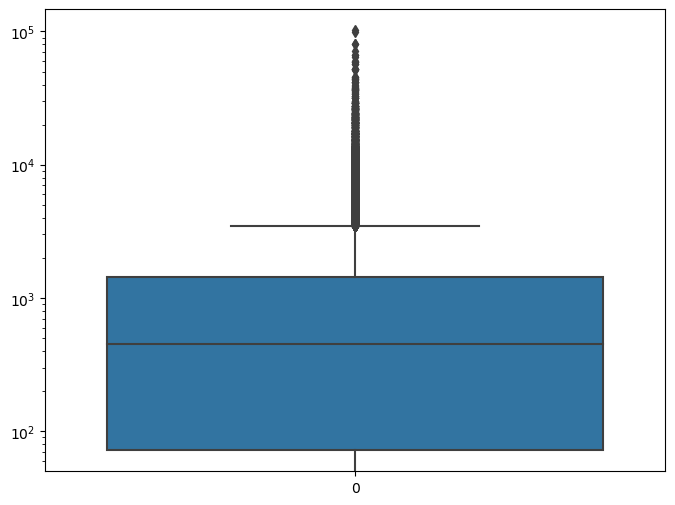

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data =df['balance'])
plt.yscale('log')
plt.show()

In [14]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [15]:
index_outlier = outlier_detection(df['balance']).index

In [16]:
df.loc[index_outlier]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51.0,management,married,tertiary,no,10635.0,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51.0,management,married,tertiary,no,6530.0,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35.0,blue-collar,single,secondary,no,12223.0,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57.0,blue-collar,married,secondary,no,5935.0,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40.0,services,divorced,unknown,no,4384.0,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35.0,services,married,tertiary,no,4655.0,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46.0,blue-collar,married,secondary,no,6879.0,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60.0,services,married,tertiary,no,4256.0,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75.0,retired,divorced,tertiary,no,3810.0,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [17]:
len(df.loc[index_outlier])/len(df)

0.10462389380530973

In [18]:
df.drop(index=index_outlier, inplace=True)

In [19]:
df.drop(df[df['balance']<0].index, inplace=True)

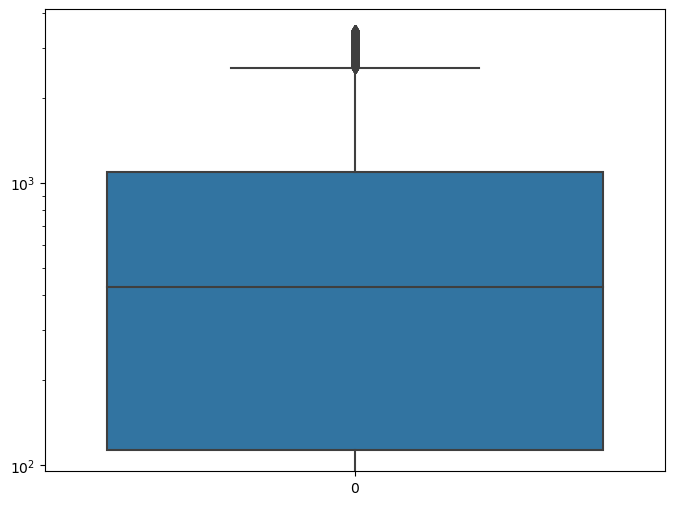

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data =df['balance'])
plt.yscale('log')
plt.show()



In [21]:
index_outlier = outlier_detection(df['age']).index

In [22]:
df.loc[index_outlier]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
29158,83.0,retired,married,primary,no,425.0,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75.0,retired,divorced,primary,no,46.0,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75.0,retired,married,primary,no,3324.0,no,no,cellular,2,feb,149,1,-1,0,unknown,no
30908,76.0,retired,married,primary,no,2590.0,no,no,telephone,9,feb,68,12,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,78.0,management,married,unknown,no,1780.0,yes,no,cellular,25,oct,211,2,185,7,success,yes
45141,77.0,unknown,married,unknown,no,397.0,no,no,telephone,8,nov,207,1,185,3,success,no
45203,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes


In [23]:
df.drop(index=index_outlier, inplace=True)

In [24]:
df['age'].min()

18.0

In [25]:
df['age'].max()

72.0

In [32]:
df['age'].dtypes

dtype('float64')

In [33]:
df['age']

1        44.0
2        33.0
3        47.0
4        33.0
5        35.0
         ... 
45202    34.0
45206    51.0
45207    71.0
45209    57.0
45210    37.0
Name: age, Length: 36423, dtype: float64

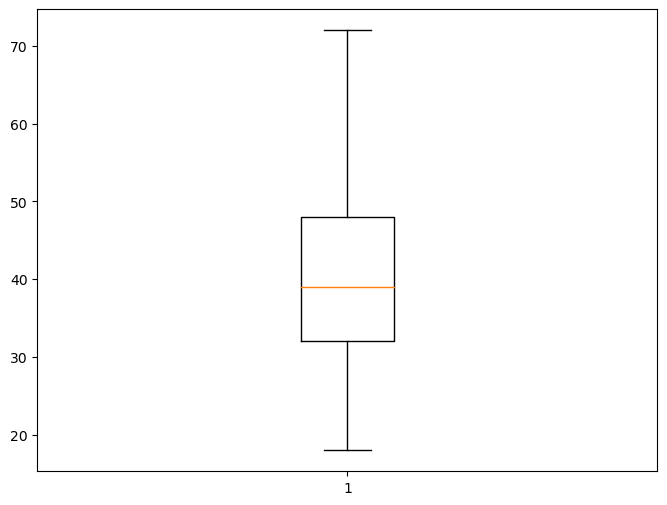

In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.show()


<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA) with Data Visualization</div>

In [36]:
def check_categorical_feature(df):
    cat_features = []
    for col in df.columns:
        if df[col].dtypes == 'O':
            cat_features.append(col)
    return cat_features

In [37]:
check_categorical_feature(df)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [38]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [39]:
categoric_columns = []
numeric_columns = []
dataset = df.copy()
columns = list(dataset.columns)
for i in columns:
    if len(dataset[i].unique()) > 12:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

In [41]:
df[numeric_columns].dtypes

age         float64
balance     float64
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
dtype: object

In [42]:
df[categoric_columns]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45202,admin.,single,secondary,no,no,no,cellular,nov,unknown,yes
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [ ]:
# categorize_columns(df)

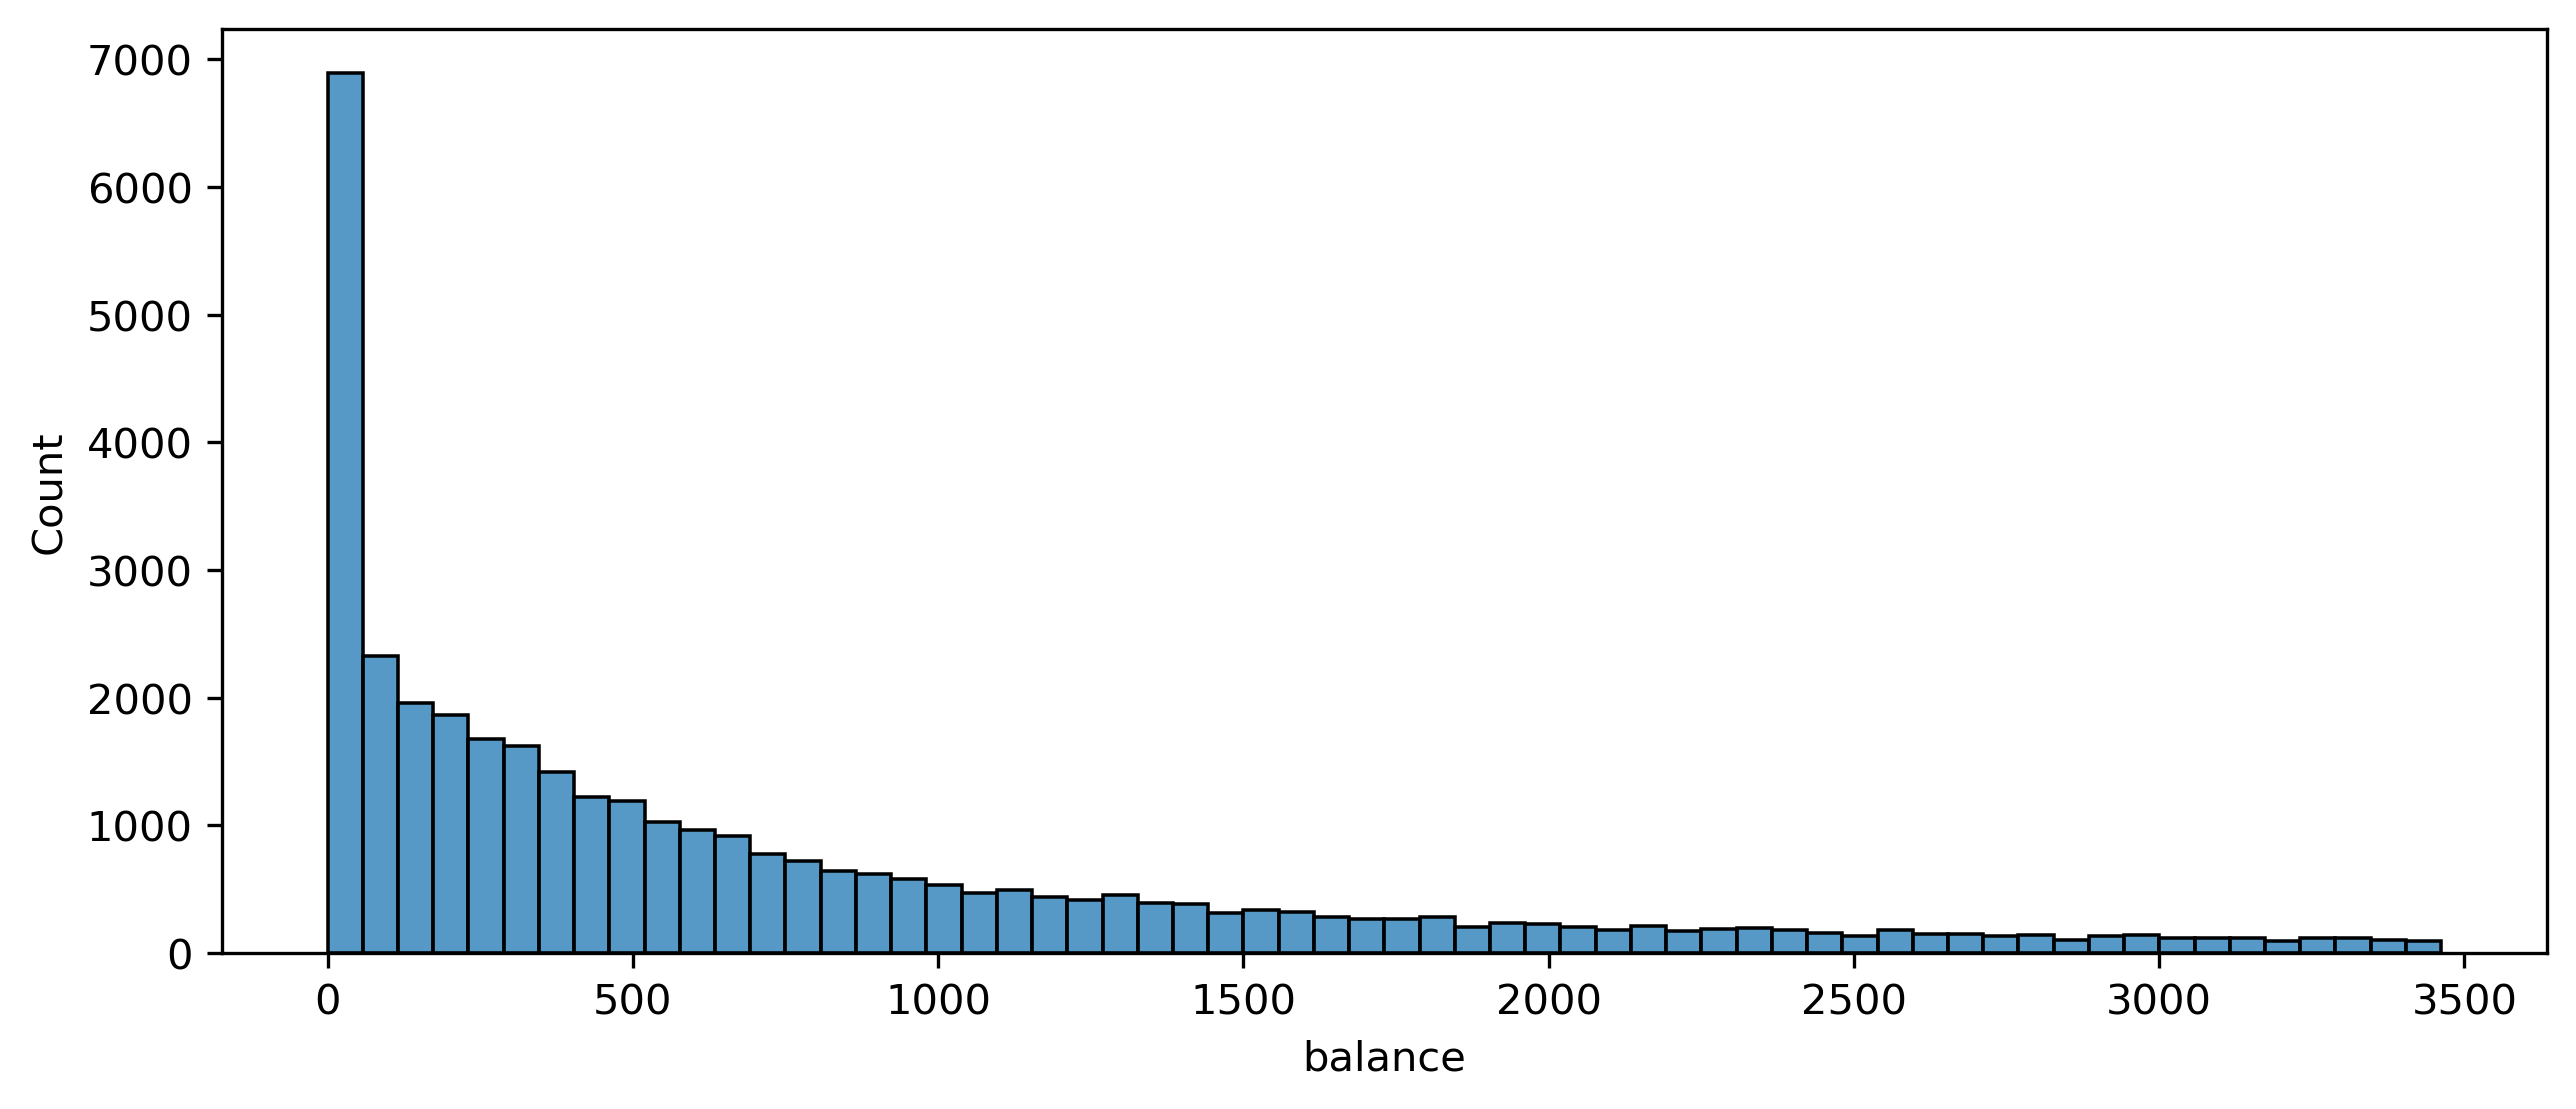

In [45]:
plt.figure(figsize= (10, 4), dpi = 300)
sns.histplot(df['balance'])
# plt.xticks(rotation = 45)
plt.show()

In [46]:
df['balance'].min()

0.0

In [47]:
df['balance'].max()

3462.0

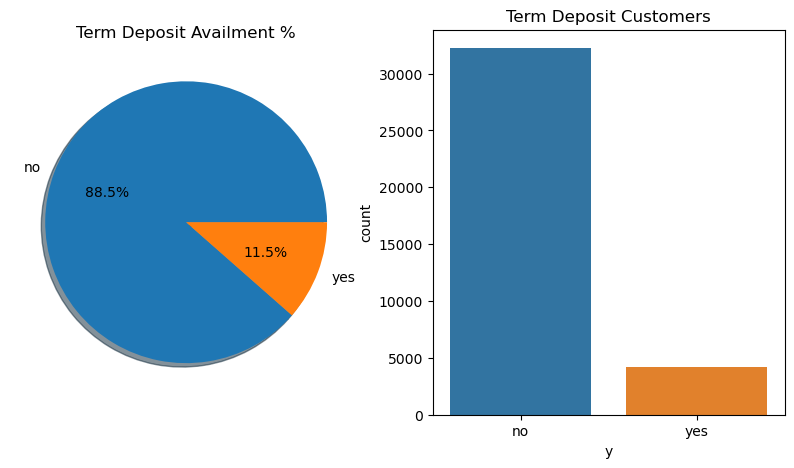

In [49]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
label = df.y.value_counts().index
label_count = df.y.value_counts().values
plt.pie(data= df, x=label_count, labels=label,autopct='%1.1f%%',shadow=True,  radius=1)
plt.title('Term Deposit Availment %')


plt.subplot(1,2,2)
sns.countplot(x='y', data=df)
plt.title('Term Deposit Customers')
plt.show()

From the above analysis we can see that only 5289 people out of 45200 have subscribed which is roughly 12%. We can see that our dataset highly unbalanced. we need to take it as a note.

In [50]:
df[numeric_columns].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.087906,-0.005572,-0.016612,0.012787,-0.031898,-0.006941
balance,0.087906,1.000000,0.013257,0.040019,-0.031973,0.023560,0.027494
day,-0.005572,0.013257,1.000000,-0.030527,0.165707,-0.092413,-0.050574
duration,-0.016612,0.040019,-0.030527,1.000000,-0.081670,-0.005250,-0.002485
campaign,0.012787,-0.031973,0.165707,-0.081670,1.000000,-0.090864,-0.031976
pdays,-0.031898,0.023560,-0.092413,-0.005250,-0.090864,1.000000,0.440727
previous,-0.006941,0.027494,-0.050574,-0.002485,-0.031976,0.440727,1.000000



<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data preprocessing and feature engineering</div>


In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [52]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

<a id="3.1"></a>
# <b>3.1 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


We will use **One-Hot Encoding** and **Label Encoding**

In [53]:
categoric_columns = []
yes_no_columns = []
numeric_columns = []

columns = list(df.columns)
    
for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(df[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)

In [54]:
print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)


Numeric features: ['age', 'job', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
------------------------------
Yes/No columns: ['default', 'housing', 'loan', 'y']
------------------------------
Categorical features: ['marital', 'education', 'contact', 'poutcome']


In [55]:
for col in df.columns: #To Know unique values
    print(col,' ',df[col].nunique())

age   55
job   12
marital   3
education   4
default   2
balance   3258
housing   2
loan   2
contact   3
day   31
month   12
duration   1497
campaign   47
pdays   537
previous   39
poutcome   4
y   2


In [56]:
encoder = LabelEncoder()  
df['job'] = encoder.fit_transform(df['job']) #By Fit transform auto encoding can be done for categorical variable JOB
job = {index : label for index, label in enumerate(encoder.classes_)}
job

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [57]:
df['marital'] = encoder.fit_transform(df['marital']) #encoding for marital
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [58]:
df['education'] = encoder.fit_transform(df['education']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [59]:
df['default'] = encoder.fit_transform(df['default']) #encoding for default
default = {index : label for index, label in enumerate(encoder.classes_)}
default

{0: 'no', 1: 'yes'}

In [60]:
df['loan'] = encoder.fit_transform(df['loan']) #encoding for Personal loan
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

{0: 'no', 1: 'yes'}

In [61]:
df['contact'] = encoder.fit_transform(df['contact']) #encoding for whether cust contacted
contact = {index : label for index, label in enumerate(encoder.classes_)}
contact

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [62]:
df['poutcome'] = encoder.fit_transform(df['poutcome']) #encoding for outcome of contact
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [63]:
df['housing'] = encoder.fit_transform(df['housing']) #encosing for housing loan taken
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

{0: 'no', 1: 'yes'}

In [64]:
df['month'] = df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sept':9,'oct':10,'nov':11,'dec':12})
#manual encoding for months to keep months as per numerical order

In [65]:
df.head() #View of data after encoding

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,9,2,1,0,29.0,1,0,2,5,5.0,151,1,-1,0,3,no
2,33.0,2,1,1,0,2.0,1,1,2,5,5.0,76,1,-1,0,3,no
3,47.0,1,1,3,0,1506.0,1,0,2,5,5.0,92,1,-1,0,3,no
4,33.0,11,2,3,0,1.0,0,0,2,5,5.0,198,1,-1,0,3,no
5,35.0,4,1,2,0,231.0,1,0,2,5,5.0,139,1,-1,0,3,no


In [ ]:
df.info()

<a id="3.1"></a>
# <b>3.1 <span style='color:#00008B'>Scaling</span></b>


In [ ]:
x = df.drop('y', axis=1)
y = df['y']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x) #Scaling the data using scaler

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

<a id="3.2.3"></a>
## <b>3.2.3 <span style='color:#00008B'>Multicollinearity</span></b>

### Detecting Multicollinearity

A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.


[More about Multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.)

In [66]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [70]:
df[numeric_columns].isnull().sum()

age           0
job           0
balance       0
day           0
month       449
duration      0
campaign      0
pdays         0
previous      0
dtype: int64

In [68]:
VIF(df[numeric_columns])

MissingDataError: exog contains inf or nans

In [ ]:
df1 = df.drop(columns = 'TotalCharges')

In [ ]:
VIF(df1[['tenure', 'MonthlyCharges']])

In [ ]:
# sns.scatterplot(x = df1['tenure'], y =df1['MonthlyCharges'])
# plt.show()

In [ ]:
dataset =df1.copy()

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>4.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


**splitting** our dataset into training and testing sets to avoid bias in your model.<br>
**Overfitting**

In [ ]:
X = dataset.drop(columns='y')
y = dataset['y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
df.info()

<a id="4.2"></a>
# <b>4.2 <span style='color:#00008B'>Model Building</span></b>

In [ ]:
Logistic = LogisticRegression()

In [ ]:
Logistic.fit(x_train, y_train)

In [ ]:
y_pred =  Logistic.predict(x_test)

In [ ]:
y_test

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

In [ ]:
model_eval(y_test, y_pred)

In [ ]:
x_train

<a id="4.2.1"></a>
## <b>4.2.1 <span style='color:#00008B'>Feature selection</span></b>


<a id="4.2.1.1"></a>
### <b>4.2.1.1 <span style='color:#00008B'>Recursive Feature Elimination (RFE)</span></b>

[More about RFE](https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/#:~:text=Recursive%20Feature%20Elimination%20is%20a,number%20of%20features%20is%20obtained.)
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Initialize RFE with desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature indices
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]

```


<a id="4.2.1.2"></a>
### <b>4.2.1.2 <span style='color:#00008B'>Model building using RFE</span></b>

---
**Recursive Feature Elimination** algorithm works in the following steps:
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Eliminate the least important feature.
3. Build a model using the remaining features.

In [ ]:
n = int(input('Input the number of features you want to predict: '))

rfe = RFE(Logistic, n_features_to_select= n)
rfe.fit(x_train, y_train)

In [ ]:
x_train.columns

In [ ]:
rfe.support_

In [ ]:

selected_features = x_train[x_train.columns[rfe.support_]]

In [ ]:
selected_features

In [ ]:
# selected_features

In [ ]:
Logistic1 = LogisticRegression()

In [ ]:
# 

In [ ]:
# x_train = x_train[selected_features]

In [ ]:
Logistic1.fit(selected_features, y_train)

In [ ]:
selected_features.columns

In [ ]:
x_test[selected_features.columns]

In [ ]:
y_pred1 = Logistic1.predict(x_test[selected_features.columns])

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span>Model Evaluation</div>

In [ ]:
model_eval(y_test, y_pred1)

In [ ]:
Logistic1.coef_

In [ ]:
from explainerdashboard import ClassifierExplainer , ExplainerDashboard

explainer = ClassifierExplainer(Logistic1, selected_features, y_train)
ExplainerDashboard(explainer).run()